In [2]:
import pandas as pd
import numpy as np
import statsmodels.tsa.stattools as sts

In [7]:
%matplotlib inline

In [4]:
#import data
ctcs=pd.read_csv('close_contacts_dec_20_ox_st.csv', index_col='purchase_date', parse_dates=True)
ctcs.head()

,purchase_dow,total_close_contacts
purchase_date,,
2020-12-01,2,111889
2020-12-02,3,1010399
2020-12-03,4,783334
2020-12-04,5,1435635
2020-12-05,6,1908635


In [8]:
ctcs.dtypes

purchase_dow            int64
total_close_contacts    int64
dtype: object

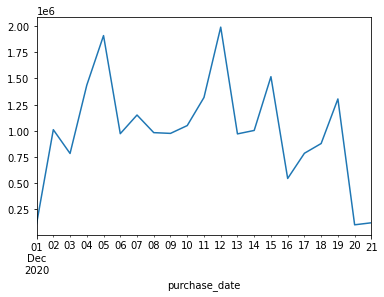

In [9]:
ctcs['total_close_contacts'].plot();

# Augmented Dicky Fuller test (ADF-test) to test for stationarity 

# the output of the test is: 
- adf
The test statistic.

- pvaluefloat
MacKinnon”s approximate p-value based on MacKinnon (1994, 2010).

- usedlagint
The number of lags used.

- nobsint
The number of observations used for the ADF regression and calculation of the critical values.

- critical valuesdict
Critical values for the test statistic at the 1 %, 5 %, and 10 % levels. Based on MacKinnon (2010).

- icbestfloat
The maximized information criterion if autolag is not None.

- resstoreResultStore, optional
A dummy class with results attached as attributes.

In [12]:
#now lets perform a Augmented Dicky Fuller test (ADF-test) to test for stationarity 
#get pvalue: 

sts.adfuller(ctcs['total_close_contacts'])[1]


0.9557376672179161

The t statistic is > 0.05 and therefore we can reject H0 that the series is stationnary

# Differencing to make the series stationnary:

Another way to remove the trend is called "differencing", where you look at the difference between successive data points (called "first-order differencing", because you're only looking at the difference between one data point and the one before it)

In [27]:
sts.adfuller(ctcs['total_close_contacts'].diff().dropna())[1] #first oder differencing

0.9980700123793954

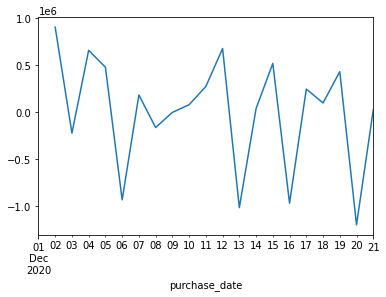

In [28]:
ctcs['total_close_contacts'].diff().plot();

In [48]:
#now try different orders:
sts.adfuller(ctcs['total_close_contacts'].diff(6).dropna())[1]


0.01494283203423332

## With a differencing of 6 days, it becomes stationary.

# We can try also try a log transformation.

In [49]:

ctcs['log_contacts'] = np.log(ctcs['total_close_contacts'])

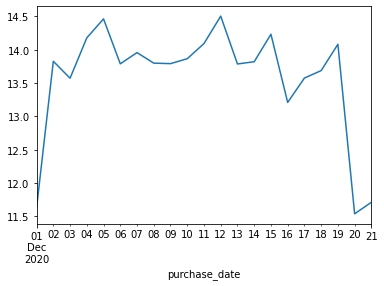

In [50]:
ctcs['log_contacts'].plot();

In [51]:
sts.adfuller(ctcs['log_contacts'].diff(4).dropna())[1]

0.0014384622858834503

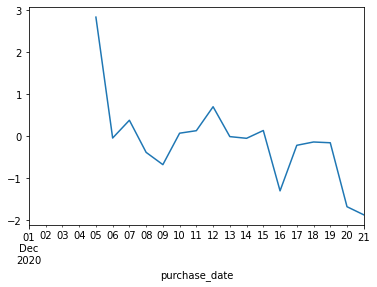

In [52]:
ctcs['log_contacts'].diff(4).plot();